# Gradient Descent

Gradient descent is a method for unconstrained mathematical **optimization**. It is a first-order iterative algorithm for finding a **local minimum** of a differentiable multivariate function. It is particularly useful in machine learning for minimizing the cost or loss function.

The idea is to take **repeated steps in the opposite direction of the gradient** (or approximate gradient) of the function at the current point, because this is the direction of steepest descent. Conversely, stepping in the direction of the gradient will lead to a local maximum of that function; the procedure is then known as gradient ascent.

![](https://easyai.tech/wp-content/uploads/2019/01/tiduxiajiang-1.png)

## Intuition

$$\hat{y_i} = w_1x_1 + w_2x_2 + \dots + w_nx_n + b$$

$$\text{Loss Function: J (w,b)} = \sum_{i=1}^D (\hat{y_i}-y_i)^2 = \sum_{i=1}^D ({w_1x_1 + w_2x_2 + \dots + w_nx_n + b}-y_i)^2$$

$$\frac{\partial{J}}{\partial{w}} = 2  $$  
$$\frac{\partial{J}}{\partial{b}}$$

## Algorithm of Gradient Descent

1. Take the derivative of the *loss function* w.r.t. one variable at a time and substitute its value at that point.
2. Calculate the step size by multiplying the above calculated value by a scalar called *learning rate*.
3. Subtract the step size from the prior value of the variable, thereby updating it.
4. Continue it till the difference between the ultimate and the penultimate value of the variable being evaluated is very small.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

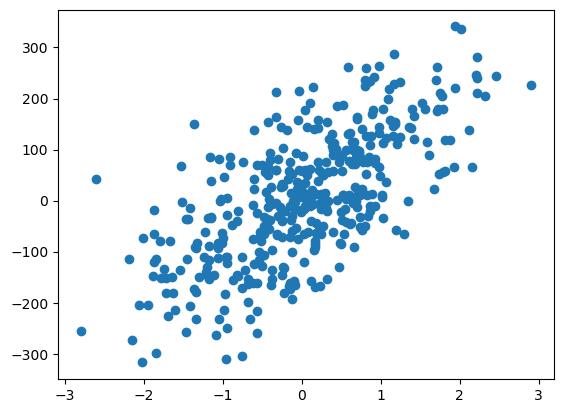

In [2]:
X, y = make_regression(n_samples=400,n_features=1,n_informative=1,n_targets=1,noise=97,random_state=2002)
plt.scatter(X,y);

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.3,random_state=2002)

In [4]:
class GDRegressor:
    
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        # training the model on training set
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m,self.b)
        
    def predict(self,X):
        return self.m * X + self.b
    

In [25]:
gdr = GDRegressor(0.001,50)

In [26]:
gdr.fit(X_train,y_train)

87.14985644884246 2.221005775036209


In [27]:
lr = LinearRegression()

In [28]:
lr.fit(X_train,y_train)

LinearRegression()

In [29]:
lr.coef_, lr.intercept_

(array([87.1501419]), 2.221274803490595)

## Types of Gradient Descent

1. Batch Gradient Descent
2. Stochastic Gradient Descent
3. Mini Batch Gradient Descent